### Data Pull from Reddit

In [1]:
#import packages

from psaw import PushshiftAPI
import datetime as dt
import pandas as pd

api = PushshiftAPI()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

Loading BokehJS ...

In [99]:
#define date delta (days=1 is everyday, days=2 skips one day)

delta_01 = dt.timedelta(days=1)

#define start date and end date

start_date_01 = dt.date(2022, 4, 30)
end_date_01 = dt.date(2022, 5, 31)

end_date_02 = dt.date(2022, 5, 31)

#define keywords

keywords_01 = ["TerraLuna", "Terra", "Luna", "UST", "LUNA", "Do Kwon", "Kwon", "TerraUSD"]

#define subreddit
subreddit_01="terraluna"
subreddit_02=["cryptocurrency", "bitcoin"]

In [74]:
#get submissions, TerraLuna Subreddit
while start_date_01 <= end_date_01:
    #print start date
    print(start_date_01)
    #print start epoch
    start_epoch=int(dt.datetime(start_date_01.year, start_date_01.month, start_date_01.day).timestamp())
    print(start_epoch)
    end_epoch_temp = start_date_01 + delta_01
    end_epoch=int(dt.datetime(end_epoch_temp.year, end_epoch_temp.month, end_epoch_temp.day).timestamp())
    print(end_epoch)
    start_date_01 += delta_01
    gen = api.search_submissions(after=start_epoch, before=end_epoch, subreddit=subreddit_01)
    df = pd.DataFrame([obj.d_ for obj in gen])
    df.to_csv(start_date_01.strftime('%m_%d_%Y')+"-"+".csv")

2022-05-03
1651507200
1651593600
2022-05-04
1651593600
1651680000
2022-05-05
1651680000
1651766400
2022-05-06
1651766400
1651852800
2022-05-07
1651852800
1651939200
2022-05-08
1651939200
1652025600
2022-05-09
1652025600
1652112000
2022-05-10
1652112000
1652198400
2022-05-11
1652198400
1652284800
2022-05-12
1652284800
1652371200
2022-05-13
1652371200
1652457600
2022-05-14
1652457600
1652544000
2022-05-15
1652544000
1652630400
2022-05-16
1652630400
1652716800
2022-05-17
1652716800
1652803200
2022-05-18
1652803200
1652889600
2022-05-19
1652889600
1652976000
2022-05-20
1652976000
1653062400
2022-05-21
1653062400
1653148800
2022-05-22
1653148800
1653235200
2022-05-23
1653235200
1653321600
2022-05-24
1653321600
1653408000
2022-05-25
1653408000
1653494400
2022-05-26
1653494400
1653580800
2022-05-27
1653580800
1653667200
2022-05-28
1653667200
1653753600
2022-05-29
1653753600
1653840000
2022-05-30
1653840000
1653926400
2022-05-31
1653926400
1654012800


In [100]:
#get submissions, other crypto subreddits, TerraLuna specific keywords
while start_date_01 <= end_date_02:
    #print start date
    print(start_date_01)
    #print start epoch
    start_epoch=int(dt.datetime(start_date_01.year, start_date_01.month, start_date_01.day).timestamp())
    print(start_epoch)
    end_epoch_temp = start_date_01 + delta_01
    end_epoch=int(dt.datetime(end_epoch_temp.year, end_epoch_temp.month, end_epoch_temp.day).timestamp())
    print(end_epoch)
    start_date_01 += delta_01
    for key in keywords_01:
        gen = api.search_submissions(after=start_epoch, before=end_epoch, subreddit=subreddit_02, q=key)
        df = pd.DataFrame([obj.d_ for obj in gen])
        df.to_csv(start_date_01.strftime('%m_%d_%Y')+"-"+str(key)+".csv")

2022-04-30
1651248000
1651334400
2022-05-01
1651334400
1651420800
2022-05-02
1651420800
1651507200
2022-05-03
1651507200
1651593600


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


2022-05-04
1651593600
1651680000


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180

2022-05-05
1651680000
1651766400


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


2022-05-06
1651766400
1651852800


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


2022-05-07
1651852800
1651939200


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180

2022-05-08
1651939200
1652025600


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


2022-05-09
1652025600
1652112000


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


2022-05-10
1652112000
1652198400


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


2022-05-11
1652198400
1652284800


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


2022-05-12
1652284800
1652371200
2022-05-13
1652371200
1652457600
2022-05-14
1652457600
1652544000
2022-05-15
1652544000
1652630400
2022-05-16
1652630400
1652716800
2022-05-17
1652716800
1652803200
2022-05-18
1652803200
1652889600
2022-05-19
1652889600
1652976000


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


2022-05-20
1652976000
1653062400


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180

2022-05-21
1653062400
1653148800


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


2022-05-22
1653148800
1653235200


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180

2022-05-23
1653235200
1653321600


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180

2022-05-24
1653321600
1653408000


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


2022-05-25
1653408000
1653494400


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


2022-05-26
1653494400
1653580800


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


2022-05-27
1653580800
1653667200
2022-05-28
1653667200
1653753600
2022-05-29
1653753600
1653840000
2022-05-30
1653840000
1653926400


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


2022-05-31
1653926400
1654012800


/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


### Compile Data

In [3]:
import os
directory = 'TerraLuna'

In [4]:
def process_data(path):
    df=pd.read_csv(path)
    if not(df.empty):
        df['date']=pd.to_datetime(df['created_utc'],unit='s').dt.date
        df = df[['subreddit', 'selftext', 'title', 'date']]
    return df

In [5]:
df_terraluna=pd.DataFrame()

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and f.endswith(".csv"):
        df_terraluna=pd.concat([df_terraluna, process_data(f)])

In [6]:
df_terraluna.shape

(20044, 5)

In [7]:
df_terraluna.head()

,subreddit,selftext,title,date,Unnamed: 0
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against...,2022-05-09,NaN
0,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,NaN
1,CryptoCurrency,I know people are mostly burnt out on the Terr...,Can someone ELI5: Why does Terra UST have any ...,2022-05-14,NaN
2,CryptoCurrency,Here's a post of someone explaining how UST co...,They've been warned - but they didn't listen.,2022-05-13,NaN
3,CryptoCurrency,I'm so depressed that I can't even tell you ho...,terraluna ended my life,2022-05-13,NaN


In [8]:
# Reset index and drop duplicates
df_terraluna=df_terraluna.reset_index()
df_terraluna=df_terraluna.drop(['index', 'Unnamed: 0'], axis=1)
df_terraluna=df_terraluna.drop_duplicates(ignore_index=True)
df_terraluna.head()

,subreddit,selftext,title,date
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against...,2022-05-09
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14
2,CryptoCurrency,I know people are mostly burnt out on the Terr...,Can someone ELI5: Why does Terra UST have any ...,2022-05-14
3,CryptoCurrency,Here's a post of someone explaining how UST co...,They've been warned - but they didn't listen.,2022-05-13
4,CryptoCurrency,I'm so depressed that I can't even tell you ho...,terraluna ended my life,2022-05-13


In [9]:
df_terraluna.selftext.astype(str) + ' ' + df_terraluna.title.astype(str)

0        nan Trader doubles down on $10 million bet aga...
1               [removed] Where can you buy TerraLuna now?
2        I know people are mostly burnt out on the Terr...
3        Here's a post of someone explaining how UST co...
4        I'm so depressed that I can't even tell you ho...
                               ...                        
11150    nan Terra Snapshot approved by network validat...
11151                 [removed] Terra USD worth 6 cents ☹️
11152    \n\nTitle. If I wrote here one month ago that ...
11153    nan You shouldn't fear the bear market: Analys...
11154    nan Terra Community Approves Do Kwon’s Plans t...
Length: 11155, dtype: object

In [10]:
# Join title and content text as one column
df_terraluna['all_text'] = df_terraluna.selftext.astype(str) + ' ' + df_terraluna.title.astype(str)
df_terraluna.head()

,subreddit,selftext,title,date,all_text
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against...,2022-05-09,nan Trader doubles down on $10 million bet aga...
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,[removed] Where can you buy TerraLuna now?
2,CryptoCurrency,I know people are mostly burnt out on the Terr...,Can someone ELI5: Why does Terra UST have any ...,2022-05-14,I know people are mostly burnt out on the Terr...
3,CryptoCurrency,Here's a post of someone explaining how UST co...,They've been warned - but they didn't listen.,2022-05-13,Here's a post of someone explaining how UST co...
4,CryptoCurrency,I'm so depressed that I can't even tell you ho...,terraluna ended my life,2022-05-13,I'm so depressed that I can't even tell you ho...


In [11]:
df_terraluna.shape

(11155, 5)

### EDA (Pivot Etc)

In [12]:
# Make text lower
df_terraluna['all_text'] = df_terraluna['all_text'].astype(str).str.lower()
df_terraluna.head(3)

,subreddit,selftext,title,date,all_text
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against...,2022-05-09,nan trader doubles down on $10 million bet aga...
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,[removed] where can you buy terraluna now?
2,CryptoCurrency,I know people are mostly burnt out on the Terr...,Can someone ELI5: Why does Terra UST have any ...,2022-05-14,i know people are mostly burnt out on the terr...


In [13]:
# count how many submissions per day
pd.pivot_table(df_terraluna, index='date', values='all_text', columns='subreddit', aggfunc='count')

subreddit,Bitcoin,CryptoCurrency,terraluna
date,,,
2022-04-29,NaN,5.0,5.0
2022-04-30,NaN,5.0,14.0
2022-05-01,NaN,8.0,20.0
2022-05-02,NaN,11.0,35.0
2022-05-03,NaN,6.0,31.0
2022-05-04,NaN,3.0,22.0
2022-05-05,6.0,12.0,18.0
2022-05-06,2.0,13.0,24.0
2022-05-07,2.0,7.0,28.0


#### NLTK Text Analysis

In [14]:
# NLTK Package and Regex Tokenizer

import nltk
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

In [15]:
# Tokenize all_text

df_terraluna['text_token']=df_terraluna['all_text'].apply(regexp.tokenize)
df_terraluna.head()

# Get English Stopwords
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with custom stopwords
my_stopwords = ['https', 'nan', 'removed']
stopwords.extend(my_stopwords)

df_terraluna['text_token'] = df_terraluna['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df_terraluna.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shiltonjonatansalindeho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,subreddit,selftext,title,date,all_text,text_token
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against...,2022-05-09,nan trader doubles down on $10 million bet aga...,"[trader, doubles, 10, million, bet, kwon, luna..."
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,[removed] where can you buy terraluna now?,"[buy, terraluna]"
2,CryptoCurrency,I know people are mostly burnt out on the Terr...,Can someone ELI5: Why does Terra UST have any ...,2022-05-14,i know people are mostly burnt out on the terr...,"[know, people, mostly, burnt, terraluna, story..."
3,CryptoCurrency,Here's a post of someone explaining how UST co...,They've been warned - but they didn't listen.,2022-05-13,here's a post of someone explaining how ust co...,"[post, someone, explaining, ust, could, depegg..."
4,CryptoCurrency,I'm so depressed that I can't even tell you ho...,terraluna ended my life,2022-05-13,i'm so depressed that i can't even tell you ho...,"[depressed, even, tell, way, describe, much, s..."


In [16]:
# Only keep words with length more than 2

df_terraluna['text_string'] = df_terraluna['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df_terraluna.head()

,subreddit,selftext,title,date,all_text,text_token,text_string
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against...,2022-05-09,nan trader doubles down on $10 million bet aga...,"[trader, doubles, 10, million, bet, kwon, luna...",trader doubles million bet kwon luna short pos...
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,[removed] where can you buy terraluna now?,"[buy, terraluna]",buy terraluna
2,CryptoCurrency,I know people are mostly burnt out on the Terr...,Can someone ELI5: Why does Terra UST have any ...,2022-05-14,i know people are mostly burnt out on the terr...,"[know, people, mostly, burnt, terraluna, story...",know people mostly burnt terraluna story somet...
3,CryptoCurrency,Here's a post of someone explaining how UST co...,They've been warned - but they didn't listen.,2022-05-13,here's a post of someone explaining how ust co...,"[post, someone, explaining, ust, could, depegg...",post someone explaining ust could depegged goo...
4,CryptoCurrency,I'm so depressed that I can't even tell you ho...,terraluna ended my life,2022-05-13,i'm so depressed that i can't even tell you ho...,"[depressed, even, tell, way, describe, much, s...",depressed even tell way describe much sadness ...


In [17]:
# Create list of all words
all_words = ' '.join([word for word in df_terraluna['text_string']])

# Tokenize all words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [18]:
# Get distribution of words

from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'luna': 11471, 'terra': 4411, 'ust': 4270, 'crypto': 2475, 'amp': 2260, 'people': 1887, 'like': 1763, 'get': 1724, 'money': 1600, 'would': 1554, ...})

In [19]:
# Only get words with occurence of 5 or more

df_terraluna['text_string_fdist'] = df_terraluna['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 5 ]))
df_terraluna.head()

,subreddit,selftext,title,date,all_text,text_token,text_string,text_string_fdist
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against...,2022-05-09,nan trader doubles down on $10 million bet aga...,"[trader, doubles, 10, million, bet, kwon, luna...",trader doubles million bet kwon luna short pos...,trader million bet kwon luna short position
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,[removed] where can you buy terraluna now?,"[buy, terraluna]",buy terraluna,buy terraluna
2,CryptoCurrency,I know people are mostly burnt out on the Terr...,Can someone ELI5: Why does Terra UST have any ...,2022-05-14,i know people are mostly burnt out on the terr...,"[know, people, mostly, burnt, terraluna, story...",know people mostly burnt terraluna story somet...,know people mostly burnt terraluna story somet...
3,CryptoCurrency,Here's a post of someone explaining how UST co...,They've been warned - but they didn't listen.,2022-05-13,here's a post of someone explaining how ust co...,"[post, someone, explaining, ust, could, depegg...",post someone explaining ust could depegged goo...,post someone explaining ust could depegged goo...
4,CryptoCurrency,I'm so depressed that I can't even tell you ho...,terraluna ended my life,2022-05-13,i'm so depressed that i can't even tell you ho...,"[depressed, even, tell, way, describe, much, s...",depressed even tell way describe much sadness ...,depressed even tell way describe much whole li...


In [20]:
# Download for Lemmatization

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shiltonjonatansalindeho/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/shiltonjonatansalindeho/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

# get lemmatized words
df_terraluna['text_string_lem'] = df_terraluna['text_string_fdist'].apply(wordnet_lem.lemmatize)

# check if the columns are equal
df_terraluna['is_equal']=(df_terraluna['text_string_fdist']==df_terraluna['text_string_lem'])

In [22]:
# show level count
df_terraluna.is_equal.value_counts()

True     11150
False        5
Name: is_equal, dtype: int64

In [23]:
all_words_lem = ' '.join([word for word in df_terraluna['text_string_lem']])

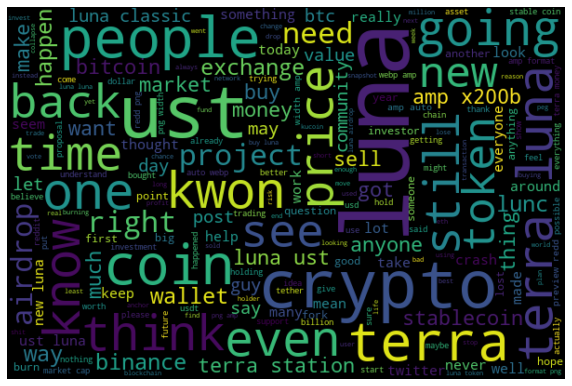

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shiltonjonatansalindeho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [27]:
fd.most_common(1000)

[('luna', 11471),
 ('terra', 4411),
 ('ust', 4270),
 ('crypto', 2475),
 ('amp', 2260),
 ('people', 1887),
 ('like', 1763),
 ('get', 1724),
 ('money', 1600),
 ('would', 1554),
 ('new', 1546),
 ('com', 1517),
 ('market', 1355),
 ('price', 1323),
 ('wallet', 1285),
 ('buy', 1238),
 ('know', 1235),
 ('kwon', 1175),
 ('back', 1115),
 ('time', 1096),
 ('coin', 1090),
 ('one', 1062),
 ('going', 1048),
 ('still', 1026),
 ('burn', 1012),
 ('airdrop', 1004),
 ('even', 998),
 ('think', 993),
 ('binance', 956),
 ('see', 924),
 ('could', 873),
 ('coins', 860),
 ('btc', 859),
 ('anyone', 824),
 ('classic', 782),
 ('crash', 781),
 ('make', 768),
 ('much', 762),
 ('station', 761),
 ('lost', 754),
 ('also', 743),
 ('sell', 721),
 ('lunc', 705),
 ('bitcoin', 693),
 ('want', 691),
 ('right', 689),
 ('help', 681),
 ('need', 678),
 ('may', 668),
 ('way', 648),
 ('bought', 647),
 ('many', 622),
 ('got', 618),
 ('token', 610),
 ('community', 601),
 ('x200b', 600),
 ('please', 598),
 ('good', 597),
 ('post', 

In [28]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

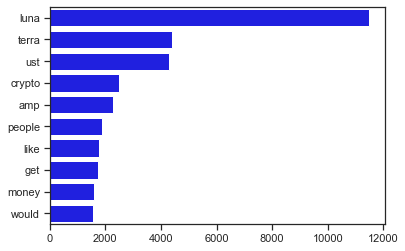

In [29]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

#### Sentiment Analysis

In [30]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shiltonjonatansalindeho/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [32]:
# Using Polarity
df_terraluna['polarity'] = df_terraluna['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df_terraluna.tail(3)

,subreddit,selftext,title,date,all_text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
11152,CryptoCurrency,\n\nTitle. If I wrote here one month ago that ...,If I wrote here one month ago that 1DOGE is mo...,2022-05-25,\n\ntitle. if i wrote here one month ago that ...,"[title, wrote, one, month, ago, 1doge, valuabl...",title wrote one month ago 1doge valuable terra...,title wrote one month ago 1doge valuable terra...,title wrote one month ago 1doge valuable terra...,True,"{'neg': 0.14, 'neu': 0.614, 'pos': 0.246, 'com..."
11153,CryptoCurrency,NaN,You shouldn't fear the bear market: Analysing ...,2022-05-25,nan you shouldn't fear the bear market: analys...,"[fear, bear, market, analysing, crypto, bear, ...",fear bear market analysing crypto bear market ...,fear bear market crypto bear market terra coll...,fear bear market crypto bear market terra coll...,True,"{'neg': 0.416, 'neu': 0.584, 'pos': 0.0, 'comp..."
11154,CryptoCurrency,NaN,Terra Community Approves Do Kwon’s Plans to Re...,2022-05-25,nan terra community approves do kwon’s plans t...,"[terra, community, approves, kwon, plans, revi...",terra community approves kwon plans revive pro...,terra community kwon plans revive project,terra community kwon plans revive project,True,"{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'comp..."


In [33]:
# Change data structure
df_terraluna = pd.concat(
    [df_terraluna, 
     df_terraluna['polarity'].apply(pd.Series)], axis=1)
df_terraluna.head(3)

,subreddit,selftext,title,date,all_text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity,neg,neu,pos,compound
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against...,2022-05-09,nan trader doubles down on $10 million bet aga...,"[trader, doubles, 10, million, bet, kwon, luna...",trader doubles million bet kwon luna short pos...,trader million bet kwon luna short position,trader million bet kwon luna short position,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,[removed] where can you buy terraluna now?,"[buy, terraluna]",buy terraluna,buy terraluna,buy terraluna,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
2,CryptoCurrency,I know people are mostly burnt out on the Terr...,Can someone ELI5: Why does Terra UST have any ...,2022-05-14,i know people are mostly burnt out on the terr...,"[know, people, mostly, burnt, terraluna, story...",know people mostly burnt terraluna story somet...,know people mostly burnt terraluna story somet...,know people mostly burnt terraluna story somet...,True,"{'neg': 0.153, 'neu': 0.583, 'pos': 0.264, 'co...",0.153,0.583,0.264,0.8144


In [34]:
# Create new sentiment variable
df_terraluna['sentiment'] = df_terraluna['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df_terraluna.head(4)

,subreddit,selftext,title,date,all_text,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity,neg,neu,pos,compound,sentiment
0,CryptoCurrency,NaN,Trader doubles down on $10 million bet against...,2022-05-09,nan trader doubles down on $10 million bet aga...,"[trader, doubles, 10, million, bet, kwon, luna...",trader doubles million bet kwon luna short pos...,trader million bet kwon luna short position,trader million bet kwon luna short position,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral
1,CryptoCurrency,[removed],Where can you buy TerraLuna now?,2022-05-14,[removed] where can you buy terraluna now?,"[buy, terraluna]",buy terraluna,buy terraluna,buy terraluna,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral
2,CryptoCurrency,I know people are mostly burnt out on the Terr...,Can someone ELI5: Why does Terra UST have any ...,2022-05-14,i know people are mostly burnt out on the terr...,"[know, people, mostly, burnt, terraluna, story...",know people mostly burnt terraluna story somet...,know people mostly burnt terraluna story somet...,know people mostly burnt terraluna story somet...,True,"{'neg': 0.153, 'neu': 0.583, 'pos': 0.264, 'co...",0.153,0.583,0.264,0.8144,positive
3,CryptoCurrency,Here's a post of someone explaining how UST co...,They've been warned - but they didn't listen.,2022-05-13,here's a post of someone explaining how ust co...,"[post, someone, explaining, ust, could, depegg...",post someone explaining ust could depegged goo...,post someone explaining ust could depegged goo...,post someone explaining ust could depegged goo...,True,"{'neg': 0.146, 'neu': 0.561, 'pos': 0.294, 'co...",0.146,0.561,0.294,0.9325,positive


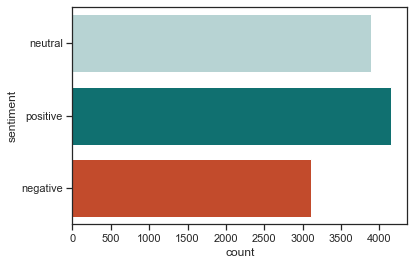

In [35]:
# Number of submissions by sentiment
sns.countplot(y='sentiment', 
             data=df_terraluna, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

#### Topic Modelling with LDA

In [41]:
import gensim
from gensim import corpora

In [50]:
df_terraluna_lda = list(zip(df_terraluna.text_string_lem, df_terraluna.date))

In [51]:
tokenized_docs = [doc.lower().split() for doc, _ in df_terraluna_lda]

In [52]:
# Create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(tokenized_docs)

In [54]:
# Create a document-term matrix with dates
corpus = []
for doc, date in df_terraluna_lda:
    doc_bow = dictionary.doc2bow(doc.lower().split())
    corpus.append((doc_bow, date))

In [60]:
# Perform LDA
lda_model = gensim.models.LdaModel(corpus=[doc for doc, _ in corpus],
                                   id2word=dictionary,
                                   num_topics=2,
                                   passes=10)

In [68]:
from gensim.models import CoherenceModel

for i in range(1,10):
    lda_model = gensim.models.LdaModel(corpus=[doc for doc, _ in corpus],
                                   id2word=dictionary,
                                   num_topics=i,
                                   passes=10)
    
    # Calculate coherence value
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
    coherence_value = coherence_model.get_coherence()

    print("No of topics: ",i," Coherence Value:", coherence_value)

No of topics:  1  Coherence Value: 0.3214499831487789
No of topics:  2  Coherence Value: 0.41100388900167234
No of topics:  3  Coherence Value: 0.4417174835426338
No of topics:  4  Coherence Value: 0.4253822123324826
No of topics:  5  Coherence Value: 0.4477732553478873
No of topics:  6  Coherence Value: 0.4656695858563922
No of topics:  7  Coherence Value: 0.49634717801914935
No of topics:  8  Coherence Value: 0.46425614812959043
No of topics:  9  Coherence Value: 0.4613793855937487


In [ ]:
# Perform LDA
lda_model = gensim.models.LdaModel(corpus=[doc for doc, _ in corpus],
                                   id2word=dictionary,
                                   num_topics=2,
                                   passes=10)

In [61]:
# Print the topics and their top keywords
for idx, topic in lda_model.print_topics():
    print(f"Topic #{idx + 1}: {topic}")

Topic #1: 0.013*"luna" + 0.013*"crypto" + 0.010*"people" + 0.009*"amp" + 0.008*"like" + 0.007*"market" + 0.006*"money" + 0.006*"would" + 0.005*"think" + 0.005*"even"
Topic #2: 0.083*"luna" + 0.037*"terra" + 0.029*"ust" + 0.013*"wallet" + 0.012*"com" + 0.011*"new" + 0.011*"airdrop" + 0.010*"binance" + 0.009*"get" + 0.009*"lunc"


In [62]:
# Perform date-based analysis
topic_distribution_by_date = {}
for doc_bow, date in corpus:
    topics = lda_model.get_document_topics(doc_bow)
    for topic in topics:
        if topic[0] not in topic_distribution_by_date:
            topic_distribution_by_date[topic[0]] = []
        topic_distribution_by_date[topic[0]].append((date, topic[1]))

In [63]:
# Print topic distribution by date
print("\nTopic Distribution by Date:")
for topic, date_probs in topic_distribution_by_date.items():
    print(f"Topic #{topic + 1}:")
    for date, prob in date_probs:
        print(f"- Date: {date.strftime('%Y-%m-%d')}, Probability: {prob}")


Topic Distribution by Date:
Topic #1:
- Date: 2022-05-09, Probability: 0.8216193914413452
- Date: 2022-05-14, Probability: 0.2811720371246338
- Date: 2022-05-14, Probability: 0.5837497115135193
- Date: 2022-05-13, Probability: 0.7509253621101379
- Date: 2022-05-13, Probability: 0.9436472654342651
- Date: 2022-05-13, Probability: 0.716496467590332
- Date: 2022-05-14, Probability: 0.2622564733028412
- Date: 2022-05-14, Probability: 0.1986754685640335
- Date: 2022-05-14, Probability: 0.13366003334522247
- Date: 2022-05-14, Probability: 0.07402360439300537
- Date: 2022-05-14, Probability: 0.1154528558254242
- Date: 2022-05-14, Probability: 0.9965649843215942
- Date: 2022-05-14, Probability: 0.693612813949585
- Date: 2022-05-14, Probability: 0.9067188501358032
- Date: 2022-05-14, Probability: 0.11100488901138306
- Date: 2022-05-14, Probability: 0.9299797415733337
- Date: 2022-05-14, Probability: 0.929541289806366
- Date: 2022-05-14, Probability: 0.928548276424408
- Date: 2022-05-14, Probab

- Date: 2022-05-18, Probability: 0.16843551397323608
- Date: 2022-05-18, Probability: 0.6393548250198364
- Date: 2022-05-18, Probability: 0.4293757975101471
- Date: 2022-05-18, Probability: 0.4931707978248596
- Date: 2022-05-18, Probability: 0.03613043949007988
- Date: 2022-05-18, Probability: 0.035044774413108826
- Date: 2022-05-18, Probability: 0.018445808440446854
- Date: 2022-05-18, Probability: 0.12789292633533478
- Date: 2022-05-18, Probability: 0.05199950933456421
- Date: 2022-05-18, Probability: 0.9436801671981812
- Date: 2022-05-18, Probability: 0.8152708411216736
- Date: 2022-05-18, Probability: 0.7868555188179016
- Date: 2022-05-18, Probability: 0.5459030270576477
- Date: 2022-05-18, Probability: 0.8506094813346863
- Date: 2022-05-18, Probability: 0.4459706246852875
- Date: 2022-05-18, Probability: 0.878442645072937
- Date: 2022-05-18, Probability: 0.8948861360549927
- Date: 2022-05-18, Probability: 0.7136618494987488
- Date: 2022-05-18, Probability: 0.2130412459373474
- Dat

- Date: 2022-05-20, Probability: 0.38434872031211853
- Date: 2022-05-20, Probability: 0.07080555707216263
- Date: 2022-05-20, Probability: 0.620039165019989
- Date: 2022-05-20, Probability: 0.8083500266075134
- Date: 2022-05-20, Probability: 0.9080103039741516
- Date: 2022-05-20, Probability: 0.8949783444404602
- Date: 2022-05-20, Probability: 0.6569950580596924
- Date: 2022-05-20, Probability: 0.5732142925262451
- Date: 2022-05-19, Probability: 0.08760511875152588
- Date: 2022-05-07, Probability: 0.8837085962295532
- Date: 2022-05-07, Probability: 0.7978591322898865
- Date: 2022-05-06, Probability: 0.10685603320598602
- Date: 2022-05-06, Probability: 0.5796793103218079
- Date: 2022-05-06, Probability: 0.5740395188331604
- Date: 2022-05-06, Probability: 0.9480393528938293
- Date: 2022-05-06, Probability: 0.028737902641296387
- Date: 2022-05-11, Probability: 0.8867775201797485
- Date: 2022-05-11, Probability: 0.8910748362541199
- Date: 2022-05-11, Probability: 0.753143846988678
- Date: 

- Date: 2022-05-17, Probability: 0.9769153594970703
- Date: 2022-05-17, Probability: 0.04843506962060928
- Date: 2022-05-17, Probability: 0.05404108017683029
- Date: 2022-05-17, Probability: 0.059545762836933136
- Date: 2022-05-17, Probability: 0.6131084561347961
- Date: 2022-05-17, Probability: 0.5043812990188599
- Date: 2022-05-17, Probability: 0.11622963100671768
- Date: 2022-05-17, Probability: 0.7584183216094971
- Date: 2022-05-17, Probability: 0.9941396117210388
- Date: 2022-05-17, Probability: 0.07333926111459732
- Date: 2022-05-17, Probability: 0.7536702156066895
- Date: 2022-05-17, Probability: 0.1097082793712616
- Date: 2022-05-17, Probability: 0.5858495235443115
- Date: 2022-05-17, Probability: 0.21484488248825073
- Date: 2022-05-17, Probability: 0.944359540939331
- Date: 2022-05-17, Probability: 0.031052440404891968
- Date: 2022-05-17, Probability: 0.10810961574316025
- Date: 2022-05-17, Probability: 0.07174602895975113
- Date: 2022-05-17, Probability: 0.4781903922557831
- 

- Date: 2022-05-01, Probability: 0.7357728481292725
- Date: 2022-05-19, Probability: 0.09566528350114822
- Date: 2022-05-19, Probability: 0.5816613435745239
- Date: 2022-05-19, Probability: 0.3689318001270294
- Date: 2022-05-19, Probability: 0.7451899647712708
- Date: 2022-05-19, Probability: 0.8655860424041748
- Date: 2022-05-18, Probability: 0.3893640637397766
- Date: 2022-05-18, Probability: 0.6100214719772339
- Date: 2022-05-18, Probability: 0.7878396511077881
- Date: 2022-05-18, Probability: 0.11104661971330643
- Date: 2022-05-18, Probability: 0.5805572867393494
- Date: 2022-05-30, Probability: 0.09043180197477341
- Date: 2022-05-15, Probability: 0.6375167369842529
- Date: 2022-05-15, Probability: 0.9649744033813477
- Date: 2022-05-15, Probability: 0.5422171354293823
- Date: 2022-05-15, Probability: 0.8907219171524048
- Date: 2022-05-15, Probability: 0.9884554743766785
- Date: 2022-05-15, Probability: 0.7974259853363037
- Date: 2022-05-15, Probability: 0.8498139977455139
- Date: 2

- Date: 2022-05-22, Probability: 0.23453807830810547
- Date: 2022-05-22, Probability: 0.048441775143146515
- Date: 2022-05-22, Probability: 0.07337549328804016
- Date: 2022-05-22, Probability: 0.06122999265789986
- Date: 2022-05-22, Probability: 0.8964942693710327
- Date: 2022-05-22, Probability: 0.0583818294107914
- Date: 2022-05-22, Probability: 0.831396222114563
- Date: 2022-05-22, Probability: 0.8765513896942139
- Date: 2022-05-22, Probability: 0.9161545038223267
- Date: 2022-05-22, Probability: 0.8063039183616638
- Date: 2022-05-22, Probability: 0.08426916599273682
- Date: 2022-05-22, Probability: 0.49970701336860657
- Date: 2022-05-22, Probability: 0.3198675811290741
- Date: 2022-05-22, Probability: 0.9167824387550354
- Date: 2022-05-22, Probability: 0.2522379159927368
- Date: 2022-05-22, Probability: 0.925829291343689
- Date: 2022-05-22, Probability: 0.42807742953300476
- Date: 2022-05-22, Probability: 0.9483294486999512
- Date: 2022-05-22, Probability: 0.1259165108203888
- Date

- Date: 2022-05-22, Probability: 0.1269657015800476
- Date: 2022-05-22, Probability: 0.5047838091850281
- Date: 2022-05-22, Probability: 0.06104307249188423
- Date: 2022-05-22, Probability: 0.18756647408008575
- Date: 2022-05-22, Probability: 0.7366457581520081
- Date: 2022-05-22, Probability: 0.6789695620536804
- Date: 2022-05-22, Probability: 0.30330145359039307
- Date: 2022-05-22, Probability: 0.4941229820251465
- Date: 2022-05-22, Probability: 0.39512214064598083
- Date: 2022-05-22, Probability: 0.6719607710838318
- Date: 2022-05-22, Probability: 0.8439933657646179
- Date: 2022-05-22, Probability: 0.6918982267379761
- Date: 2022-05-22, Probability: 0.1217745915055275
- Date: 2022-05-22, Probability: 0.8819527626037598
- Date: 2022-05-22, Probability: 0.42824482917785645
- Date: 2022-05-22, Probability: 0.9990571141242981
- Date: 2022-05-22, Probability: 0.697545051574707
- Date: 2022-05-21, Probability: 0.9457849264144897
- Date: 2022-05-21, Probability: 0.32390034198760986
- Date:

- Date: 2022-05-30, Probability: 0.3302062451839447
- Date: 2022-05-30, Probability: 0.1265859454870224
- Date: 2022-05-30, Probability: 0.6355560421943665
- Date: 2022-05-30, Probability: 0.08942143619060516
- Date: 2022-05-30, Probability: 0.0757426917552948
- Date: 2022-05-30, Probability: 0.7458875775337219
- Date: 2022-05-30, Probability: 0.8492360711097717
- Date: 2022-05-30, Probability: 0.12639178335666656
- Date: 2022-05-30, Probability: 0.08598712831735611
- Date: 2022-05-30, Probability: 0.12567874789237976
- Date: 2022-05-30, Probability: 0.9902392625808716
- Date: 2022-05-30, Probability: 0.31284669041633606
- Date: 2022-05-30, Probability: 0.24113847315311432
- Date: 2022-05-30, Probability: 0.13571031391620636
- Date: 2022-05-30, Probability: 0.5537428259849548
- Date: 2022-05-30, Probability: 0.9366419315338135
- Date: 2022-05-30, Probability: 0.4925170838832855
- Date: 2022-05-30, Probability: 0.040119510143995285
- Date: 2022-05-30, Probability: 0.030046852305531502
-

- Date: 2022-05-11, Probability: 0.0750340074300766
- Date: 2022-05-11, Probability: 0.1479147970676422
- Date: 2022-05-11, Probability: 0.44726788997650146
- Date: 2022-05-11, Probability: 0.09094373881816864
- Date: 2022-05-11, Probability: 0.9905845522880554
- Date: 2022-05-11, Probability: 0.9905392527580261
- Date: 2022-05-11, Probability: 0.5307475924491882
- Date: 2022-05-11, Probability: 0.7986231446266174
- Date: 2022-05-11, Probability: 0.680610716342926
- Date: 2022-05-11, Probability: 0.7094323039054871
- Date: 2022-05-11, Probability: 0.8380475044250488
- Date: 2022-05-11, Probability: 0.7099382877349854
- Date: 2022-05-11, Probability: 0.4767950177192688
- Date: 2022-05-11, Probability: 0.9326995611190796
- Date: 2022-05-11, Probability: 0.08939292281866074
- Date: 2022-05-11, Probability: 0.2622620165348053
- Date: 2022-05-11, Probability: 0.5490527153015137
- Date: 2022-05-11, Probability: 0.2889656722545624
- Date: 2022-05-16, Probability: 0.7408689856529236
- Date: 20

- Date: 2022-05-14, Probability: 0.8085538148880005
- Date: 2022-05-14, Probability: 0.18682700395584106
- Date: 2022-05-14, Probability: 0.1609976440668106
- Date: 2022-05-14, Probability: 0.8140619397163391
- Date: 2022-05-14, Probability: 0.18801160156726837
- Date: 2022-05-14, Probability: 0.7872052788734436
- Date: 2022-05-14, Probability: 0.7983923554420471
- Date: 2022-05-14, Probability: 0.01683918759226799
- Date: 2022-05-14, Probability: 0.7826332449913025
- Date: 2022-05-14, Probability: 0.7450519800186157
- Date: 2022-05-14, Probability: 0.9058745503425598
- Date: 2022-05-14, Probability: 0.9114306569099426
- Date: 2022-05-14, Probability: 0.09947118163108826
- Date: 2022-05-14, Probability: 0.37839123606681824
- Date: 2022-05-14, Probability: 0.11557545512914658
- Date: 2022-05-14, Probability: 0.1604803502559662
- Date: 2022-05-14, Probability: 0.11557195335626602
- Date: 2022-05-14, Probability: 0.10000596195459366
- Date: 2022-05-14, Probability: 0.08908692002296448
- D

- Date: 2022-05-21, Probability: 0.7493391036987305
- Date: 2022-05-21, Probability: 0.9835036396980286
- Date: 2022-05-21, Probability: 0.07009485363960266
- Date: 2022-05-21, Probability: 0.04537598788738251
- Date: 2022-05-21, Probability: 0.3715468943119049
- Date: 2022-05-21, Probability: 0.9442197680473328
- Date: 2022-05-21, Probability: 0.26871973276138306
- Date: 2022-05-21, Probability: 0.9690377116203308
- Date: 2022-05-21, Probability: 0.9549180865287781
- Date: 2022-05-21, Probability: 0.7998160719871521
- Date: 2022-05-21, Probability: 0.09867076575756073
- Date: 2022-05-21, Probability: 0.40523695945739746
- Date: 2022-05-21, Probability: 0.20802219212055206
- Date: 2022-05-21, Probability: 0.8964778780937195
- Date: 2022-05-21, Probability: 0.9723668098449707
- Date: 2022-05-21, Probability: 0.9626539945602417
- Date: 2022-05-21, Probability: 0.9588870406150818
- Date: 2022-05-21, Probability: 0.4946117401123047
- Date: 2022-05-21, Probability: 0.5223615765571594
- Date

- Date: 2022-05-18, Probability: 0.5664162039756775
- Date: 2022-05-18, Probability: 0.3893008530139923
- Date: 2022-05-18, Probability: 0.04830179736018181
- Date: 2022-05-18, Probability: 0.38583582639694214
- Date: 2022-05-18, Probability: 0.317145437002182
- Date: 2022-05-18, Probability: 0.9492850303649902
- Date: 2022-05-18, Probability: 0.9155343770980835
- Date: 2022-05-18, Probability: 0.5588807463645935
- Date: 2022-05-18, Probability: 0.1765260100364685
- Date: 2022-05-18, Probability: 0.958263099193573
- Date: 2022-05-17, Probability: 0.9267973899841309
- Date: 2022-05-17, Probability: 0.6337618827819824
- Date: 2022-05-17, Probability: 0.266814649105072
- Date: 2022-05-17, Probability: 0.16614046692848206
- Date: 2022-05-17, Probability: 0.252602219581604
- Date: 2022-05-17, Probability: 0.6143761277198792
- Date: 2022-05-17, Probability: 0.3001813292503357
- Date: 2022-05-17, Probability: 0.04198315739631653
- Date: 2022-05-17, Probability: 0.01968611218035221
- Date: 202

- Date: 2022-05-25, Probability: 0.8103185892105103
- Date: 2022-05-25, Probability: 0.053846243768930435
- Date: 2022-05-25, Probability: 0.5850555300712585
- Date: 2022-05-25, Probability: 0.9118109345436096
- Date: 2022-05-25, Probability: 0.30233070254325867
- Date: 2022-05-25, Probability: 0.33834967017173767
- Date: 2022-05-25, Probability: 0.6390848755836487
- Date: 2022-05-25, Probability: 0.9655053615570068
- Date: 2022-05-25, Probability: 0.9592335820198059
- Date: 2022-05-25, Probability: 0.9604366421699524
- Date: 2022-05-25, Probability: 0.9400926828384399
- Date: 2022-05-25, Probability: 0.1296609789133072
- Date: 2022-05-25, Probability: 0.9739189743995667
- Date: 2022-05-25, Probability: 0.8748663663864136
- Date: 2022-05-25, Probability: 0.9216518402099609
- Date: 2022-05-25, Probability: 0.3652140498161316
- Date: 2022-05-25, Probability: 0.9064728617668152
- Date: 2022-05-25, Probability: 0.8797557353973389
- Date: 2022-05-25, Probability: 0.9564066529273987
- Date: 

- Date: 2022-05-20, Probability: 0.7377402186393738
- Date: 2022-05-20, Probability: 0.62859708070755
- Date: 2022-05-20, Probability: 0.8287964463233948
- Date: 2022-05-20, Probability: 0.02344827726483345
- Date: 2022-05-20, Probability: 0.6974806189537048
- Date: 2022-05-20, Probability: 0.5147960782051086
- Date: 2022-05-20, Probability: 0.6681303977966309
- Date: 2022-05-20, Probability: 0.5551338195800781
- Date: 2022-05-20, Probability: 0.39662447571754456
- Date: 2022-05-20, Probability: 0.7400860786437988
- Date: 2022-05-20, Probability: 0.8904964923858643
- Date: 2022-05-20, Probability: 0.18039748072624207
- Date: 2022-05-20, Probability: 0.10727062076330185
- Date: 2022-05-20, Probability: 0.5562196969985962
- Date: 2022-05-20, Probability: 0.7375786304473877
- Date: 2022-05-20, Probability: 0.2945336103439331
- Date: 2022-05-20, Probability: 0.3899916112422943
- Date: 2022-05-20, Probability: 0.4664812684059143
- Date: 2022-05-20, Probability: 0.8946870565414429
- Date: 20

- Date: 2022-05-17, Probability: 0.4956187307834625
- Date: 2022-05-17, Probability: 0.8837702870368958
- Date: 2022-05-17, Probability: 0.2415817230939865
- Date: 2022-05-17, Probability: 0.9266607761383057
- Date: 2022-05-17, Probability: 0.24632979929447174
- Date: 2022-05-17, Probability: 0.8902917504310608
- Date: 2022-05-17, Probability: 0.4141504764556885
- Date: 2022-05-17, Probability: 0.7851551175117493
- Date: 2022-05-17, Probability: 0.055640410631895065
- Date: 2022-05-17, Probability: 0.9689475893974304
- Date: 2022-05-17, Probability: 0.8918904066085815
- Date: 2022-05-17, Probability: 0.9282539486885071
- Date: 2022-05-17, Probability: 0.5218095779418945
- Date: 2022-05-17, Probability: 0.0952940359711647
- Date: 2022-05-17, Probability: 0.8059084415435791
- Date: 2022-05-17, Probability: 0.1795348972082138
- Date: 2022-05-17, Probability: 0.11945650726556778
- Date: 2022-05-17, Probability: 0.721042275428772
- Date: 2022-05-17, Probability: 0.2937503755092621
- Date: 2

- Date: 2022-05-23, Probability: 0.9790533185005188
- Date: 2022-05-23, Probability: 0.26994630694389343
- Date: 2022-05-23, Probability: 0.9653265476226807
- Date: 2022-05-23, Probability: 0.9473337531089783
- Date: 2022-05-23, Probability: 0.20671814680099487
- Date: 2022-05-23, Probability: 0.07833872735500336
- Date: 2022-05-23, Probability: 0.9645657539367676
- Date: 2022-05-23, Probability: 0.925814688205719
- Date: 2022-05-23, Probability: 0.810408353805542
- Date: 2022-05-23, Probability: 0.975304126739502
- Date: 2022-05-23, Probability: 0.6223267912864685
- Date: 2022-05-23, Probability: 0.6869305968284607
- Date: 2022-05-23, Probability: 0.13423722982406616
- Date: 2022-05-23, Probability: 0.9437872171401978
- Date: 2022-05-23, Probability: 0.1575765311717987
- Date: 2022-05-23, Probability: 0.18593533337116241
- Date: 2022-05-23, Probability: 0.0461580716073513
- Date: 2022-05-23, Probability: 0.09038502722978592
- Date: 2022-05-23, Probability: 0.03729689121246338
- Date: 

- Date: 2022-06-01, Probability: 0.3310036063194275
- Date: 2022-06-01, Probability: 0.5308959484100342
- Date: 2022-06-01, Probability: 0.9154164791107178
- Date: 2022-06-01, Probability: 0.9500007629394531
- Date: 2022-06-01, Probability: 0.08057309687137604
- Date: 2022-06-01, Probability: 0.2543675899505615
- Date: 2022-06-01, Probability: 0.6558158993721008
- Date: 2022-06-01, Probability: 0.9418469667434692
- Date: 2022-06-01, Probability: 0.9689728021621704
- Date: 2022-06-01, Probability: 0.12580054998397827
- Date: 2022-06-01, Probability: 0.5864123106002808
- Date: 2022-06-01, Probability: 0.27469730377197266
- Date: 2022-05-31, Probability: 0.6067820191383362
- Date: 2022-05-31, Probability: 0.9421545267105103
- Date: 2022-05-31, Probability: 0.8091650009155273
- Date: 2022-05-31, Probability: 0.1251564919948578
- Date: 2022-05-31, Probability: 0.37758639454841614
- Date: 2022-05-31, Probability: 0.9585239887237549
- Date: 2022-05-31, Probability: 0.2558463215827942
- Date: 

- Date: 2022-05-10, Probability: 0.05837130919098854
- Date: 2022-05-10, Probability: 0.2276710867881775
- Date: 2022-05-10, Probability: 0.6338603496551514
- Date: 2022-05-10, Probability: 0.8291736245155334
- Date: 2022-05-10, Probability: 0.8291799426078796
- Date: 2022-05-10, Probability: 0.17769530415534973
- Date: 2022-05-10, Probability: 0.44439971446990967
- Date: 2022-05-10, Probability: 0.011795442551374435
- Date: 2022-05-10, Probability: 0.2733629047870636
- Date: 2022-05-10, Probability: 0.41517844796180725
- Date: 2022-05-10, Probability: 0.4214586317539215
- Date: 2022-05-10, Probability: 0.3057107627391815
- Date: 2022-05-10, Probability: 0.26359760761260986
- Date: 2022-05-10, Probability: 0.5539109110832214
- Date: 2022-05-13, Probability: 0.026264186948537827
- Date: 2022-05-12, Probability: 0.8114814758300781
- Date: 2022-05-12, Probability: 0.37900468707084656
- Date: 2022-05-23, Probability: 0.42403119802474976
- Date: 2022-05-23, Probability: 0.6245683431625366
-

- Date: 2022-05-23, Probability: 0.1199703961610794
- Date: 2022-05-23, Probability: 0.04101893678307533
- Date: 2022-05-23, Probability: 0.07911194115877151
- Date: 2022-05-23, Probability: 0.28647446632385254
- Date: 2022-05-23, Probability: 0.7101007699966431
- Date: 2022-05-23, Probability: 0.8938804864883423
- Date: 2022-05-23, Probability: 0.9718316793441772
- Date: 2022-05-23, Probability: 0.6670852899551392
- Date: 2022-05-23, Probability: 0.9021740555763245
- Date: 2022-05-23, Probability: 0.17580470442771912
- Date: 2022-05-23, Probability: 0.5631762146949768
- Date: 2022-05-23, Probability: 0.4702814519405365
- Date: 2022-05-23, Probability: 0.8526607155799866
- Date: 2022-05-23, Probability: 0.8611283898353577
- Date: 2022-05-23, Probability: 0.9718711972236633
- Date: 2022-05-23, Probability: 0.8954720497131348
- Date: 2022-05-23, Probability: 0.05387645587325096
- Date: 2022-05-23, Probability: 0.9568794965744019
- Date: 2022-05-23, Probability: 0.8994560241699219
- Date:

- Date: 2022-05-12, Probability: 0.4435015320777893
- Date: 2022-05-12, Probability: 0.7377448678016663
- Date: 2022-05-12, Probability: 0.3370129466056824
- Date: 2022-05-12, Probability: 0.4794982075691223
- Date: 2022-05-12, Probability: 0.385163813829422
- Date: 2022-05-12, Probability: 0.10078668594360352
- Date: 2022-05-12, Probability: 0.8432047367095947
- Date: 2022-05-12, Probability: 0.6883759498596191
- Date: 2022-05-12, Probability: 0.01138294767588377
- Date: 2022-05-12, Probability: 0.24298402667045593
- Date: 2022-05-12, Probability: 0.5626862645149231
- Date: 2022-05-12, Probability: 0.2057071477174759
- Date: 2022-05-12, Probability: 0.08721359074115753
- Date: 2022-05-12, Probability: 0.1946042776107788
- Date: 2022-05-12, Probability: 0.4230755567550659
- Date: 2022-05-12, Probability: 0.42918211221694946
- Date: 2022-05-12, Probability: 0.8081573843955994
- Date: 2022-05-12, Probability: 0.04651181772351265
- Date: 2022-05-12, Probability: 0.3967817723751068
- Date:

- Date: 2022-05-29, Probability: 0.8134575486183167
- Date: 2022-05-29, Probability: 0.3025083839893341
- Date: 2022-05-29, Probability: 0.4082612097263336
- Date: 2022-05-29, Probability: 0.8440890908241272
- Date: 2022-05-29, Probability: 0.6452949643135071
- Date: 2022-05-29, Probability: 0.6490594744682312
- Date: 2022-05-29, Probability: 0.3136869966983795
- Date: 2022-05-29, Probability: 0.8882619142532349
- Date: 2022-05-29, Probability: 0.8543524742126465
- Date: 2022-05-29, Probability: 0.25976669788360596
- Date: 2022-05-29, Probability: 0.9442741274833679
- Date: 2022-05-29, Probability: 0.8751907348632812
- Date: 2022-05-29, Probability: 0.07807145267724991
- Date: 2022-05-29, Probability: 0.07629859447479248
- Date: 2022-05-29, Probability: 0.06802065670490265
- Date: 2022-05-29, Probability: 0.24893133342266083
- Date: 2022-05-29, Probability: 0.609226644039154
- Date: 2022-05-28, Probability: 0.24154016375541687
- Date: 2022-05-28, Probability: 0.08892311155796051
- Date